# EXPERIMENT NO 6

## APPLY FOLLOWING REGRESSION ALGORITHMS: LINEAR, POLYNOMIAL, RIDGE, LASSO, RANDOM FOREST REGRESSION.

### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### READING THE DATA

In [2]:
# Importing only the first 30000 rows
df = pd.read_csv(
    '/DOCUMENTS/COLLEGE/CLASSES/EXPERIMENT_NO_6/Asteroid_Updated.csv/Asteroid_Updated.csv',
    low_memory=False)

In [3]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


# 

### PREPROCESSING THE DATA

#### CHECK NAN VALUES

In [4]:
# Checking which columns(features) have nan values
df.isna().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [5]:
# Get an idea of the different means, distributions, and values associated with the features
df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,...,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155636,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,...,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.093897,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,...,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,...,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,2.926897e-08,1.511339e+02,-67.136826
25%,2.385258,0.091454,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,...,4.210000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,...,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199400,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,...,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,...,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


* **Cleaning and prepping the dataframe:**  
**Steps:**
    * 0: 'diameter' is string type, I will convert to numeric. This gave errors for some diameters because they were corrupted, so I added the argument "errors='coerce'" to set corrupted diameters to nan, and later dropped those.
    * 1: Dropping irrelevent features and choosing my battles:
        * 1a/ dropping names because I dont believe asteroids are named according to their diameter.
        * 1b/ Dropping all features with more than half nan values
        * 1c/ dropping condition_code and neo and pha because most seems to be 0 or nan.
    * 2: Replace nans entries with mean value of column

In [6]:
# Steps 0
# transforming to numeric, setting errors to NaN
df['diameter'] = pd.to_numeric(df['diameter'], errors='coerce')
# rows with nan diameters to drop
dropindexes = df['diameter'][df['diameter'].isnull()].index
dropped_df = df.loc[dropindexes]  # saving dropped rows for the future
df = df.drop(dropindexes, axis=0)

In [7]:
# Steps 1
tooMuchNa = df.columns[df.isna().sum() / df.shape[0] > 0.5]
df = df.drop(tooMuchNa, axis=1)
df = df.drop('condition_code', axis=1)
df = df.drop(['neo', 'pha', 'class'], axis=1)

In [8]:
# Step 2
df = df.fillna(df.mean(numeric_only=None))

In [9]:
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.34,939.400,0.0900,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.13,545.000,0.1010,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.33,246.596,0.2140,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.20,525.400,0.4228,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,6.85,106.699,0.2740,1.09589,0.238632,1508.600458,282.366289


In [10]:
# Last sanity check for nan values
df.isna().values.any()

False

### CREATING TRAIN & TEST DATASET

In [11]:
from sklearn.model_selection import train_test_split

target = df['diameter']
predictors = df.drop(['diameter'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(predictors,
                                                    target,
                                                    test_size=0.20,
                                                    random_state=0)

In [12]:
X_train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,ma
474961,3.148871,0.130545,14.123745,20.870476,335.017941,2.737801,3.559942,5.587796,5812.0,72,16.0,0.032,1.74091,0.176389,2040.942568,171.197625
283914,3.104229,0.169382,19.711359,107.671134,182.187629,2.578429,3.630030,5.469390,6824.0,186,15.0,0.233,1.56154,0.180208,1997.694859,177.806839
241049,3.170379,0.104378,1.607302,151.293279,138.910748,2.839460,3.501298,5.645143,6684.0,272,15.6,0.064,1.82279,0.174597,2061.888649,153.747173
359366,3.123361,0.232180,13.565848,54.472085,258.745939,2.398180,3.848542,5.520031,7120.0,185,15.4,0.083,1.42886,0.178554,2016.191342,323.992520
110551,2.646488,0.191386,13.100536,39.183682,344.363064,2.139987,3.152990,4.305397,6660.0,711,14.4,0.223,1.14667,0.228928,1572.546205,77.728902


#### PERFORMING NORMALIZATION

In [13]:
from sklearn import preprocessing

# Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)


def scaler(X):
    x_norm_arr = std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index=X.index)


X_train_norm = scaler(X_train)
X_test_norm = scaler(X_test)


def inverse_scaler(X):
    x_norm_arr = std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index=X.index)

### APPLYING DIFFERENT REGRESSION ALGORITHMS

#### FUNCTION FOR MODEL VISUALIZATION

In [14]:
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
    sns.distplot(Y_test.values, label='test values', ax=ax1)
    sns.distplot(prediction, label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test, prediction, c='orange', label='predictions')
    ax2.plot(Y_test, Y_test, c='blue', label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated $\log(radius)$')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled')  # same x y scale


def score(prediction):
    score = r2_score(prediction, Y_test)
    return score


def announce(score):
    print('The R^2 score achieved using this regression is:', round(score, 3))


algorithms = []
scores = []

#### LINEAR REGRESSION

In [15]:
# Defining the model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Training
lr.fit(X_train, Y_train)

# Predicting
Y_pred_lr = lr.predict(X_test)

# Scoring
score_lr = score(Y_pred_lr) * -1
announce(score_lr)

algorithms.append('LR')
scores.append(score_lr)

The R^2 score achieved using this regression is: 0.497


In [16]:
Y_train

474961    4.276
283914    2.867
241049    3.635
359366    3.831
110551    3.813
          ...  
64431     5.672
245904    2.362
242701    2.826
405500    2.569
67651     1.911
Name: diameter, Length: 110108, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


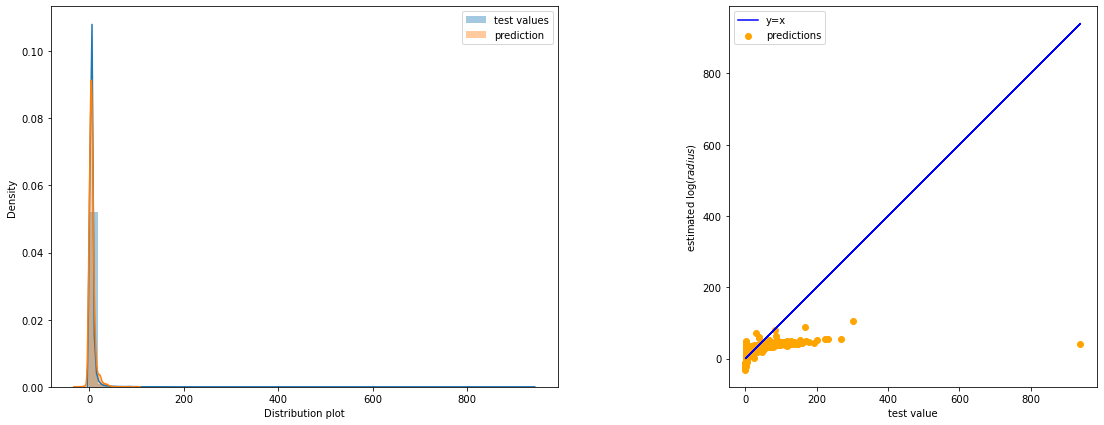

In [17]:
plot(Y_pred_lr)

#### POLYNOMIAL REGRESSION

In [18]:
# Defining the model
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(X_train)
x_poly_test = poly_features.fit_transform(X_test)

# Training
lr.fit(x_poly_train, Y_train)

# Predicting
Y_pred_pr = lr.predict(x_poly_test)

# Scoring
score_pr = score(Y_pred_pr)
announce(score_pr)

algorithms.append('POLYR')
scores.append(score_pr)

The R^2 score achieved using this regression is: 0.473


In [19]:
Y_train

474961    4.276
283914    2.867
241049    3.635
359366    3.831
110551    3.813
          ...  
64431     5.672
245904    2.362
242701    2.826
405500    2.569
67651     1.911
Name: diameter, Length: 110108, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


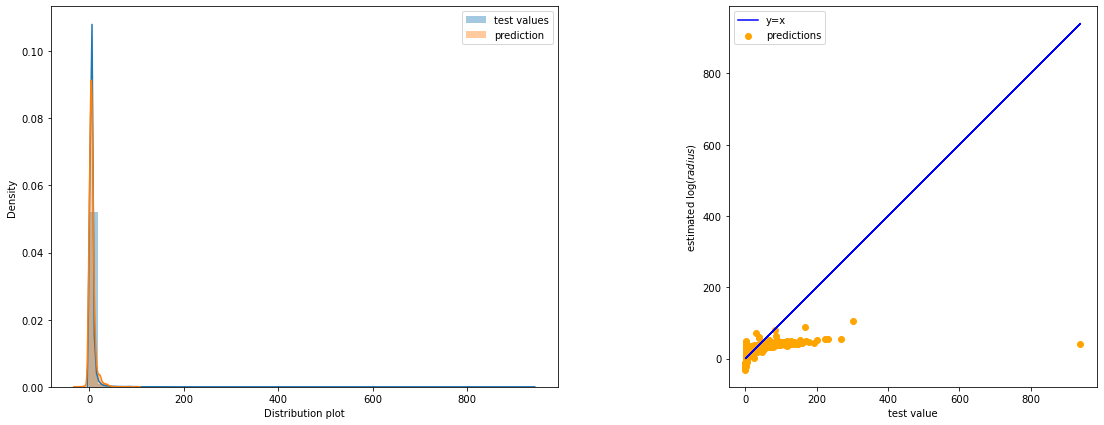

In [20]:
plot(Y_pred_lr)

#### RANDOM FOREST REGRESSION

In [21]:
# Defining the model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=32, n_estimators=50)

# Training
forest.fit(X_train_norm, np.ravel(Y_train))

# Predicting
Y_pred_forest = forest.predict(X_test_norm)

# Scoring
score_forest = score(Y_pred_forest)
announce(score_forest)

algorithms.append('RForest')
scores.append(score_forest)

The R^2 score achieved using this regression is: 0.902


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


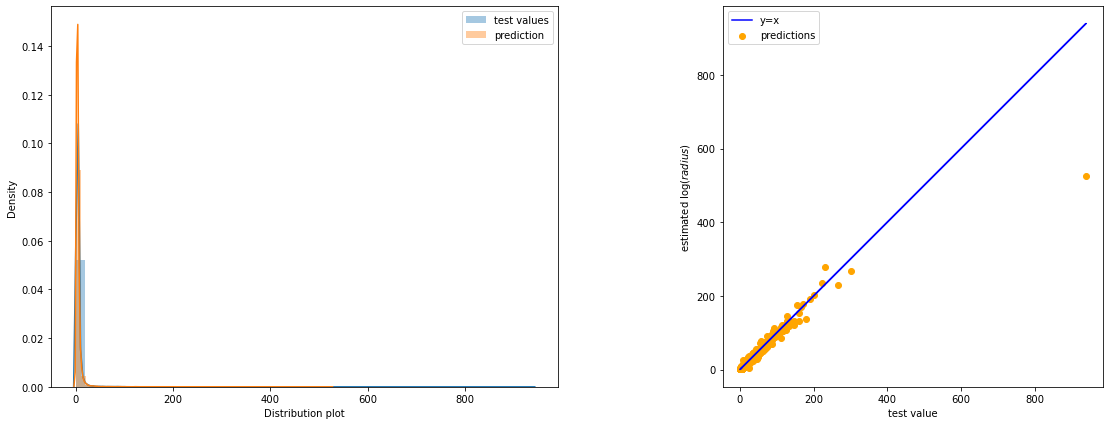

In [22]:
plot(Y_pred_forest)

#### RIDGE REGRESSION

In [23]:
# Defining the model
from sklearn.linear_model import Ridge

lr_ridge = Ridge(alpha=0.1)

# Training
lr_ridge.fit(X_train, Y_train)

# Predicting
Y_pred_lr_ridge = lr_ridge.predict(X_test)

# Scoring
score_lr_ridge = score(Y_pred_lr_ridge) * -1
announce(score_lr_ridge)

algorithms.append('RR')
scores.append(score_lr_ridge)

The R^2 score achieved using this regression is: 0.497


In [24]:
Y_train

474961    4.276
283914    2.867
241049    3.635
359366    3.831
110551    3.813
          ...  
64431     5.672
245904    2.362
242701    2.826
405500    2.569
67651     1.911
Name: diameter, Length: 110108, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


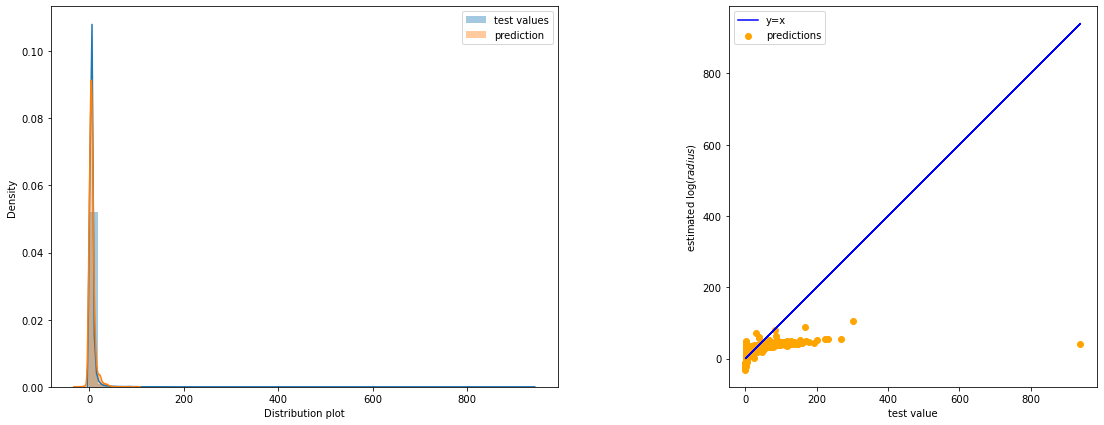

In [25]:
plot(Y_pred_lr)

#### LASSO REGRESSION

In [26]:
# Defining the model
from sklearn.linear_model import Lasso

lr_lasso = Lasso()

# Training
lr_lasso.fit(X_train, Y_train)

# Predicting
Y_pred_lr_lasso = lr_lasso.predict(X_test)

# Scoring
score_lr_lasso = score(Y_pred_lr_lasso) * -1
announce(score_lr_lasso)

algorithms.append('LASR')
scores.append(score_lr_lasso)

The R^2 score achieved using this regression is: 1.506


In [27]:
Y_train

474961    4.276
283914    2.867
241049    3.635
359366    3.831
110551    3.813
          ...  
64431     5.672
245904    2.362
242701    2.826
405500    2.569
67651     1.911
Name: diameter, Length: 110108, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


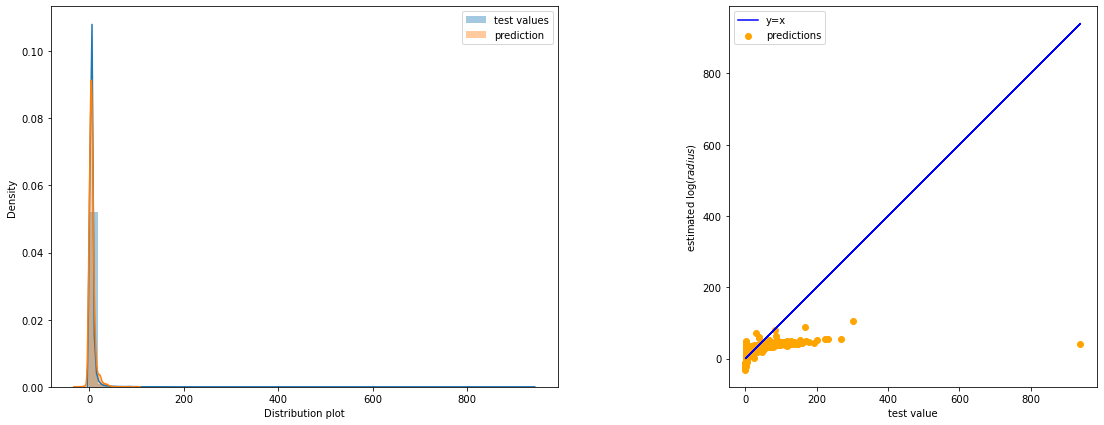

In [28]:
plot(Y_pred_lr)

#### ANALYZING DIFFRENT REGRESSION ALGORITHMS

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

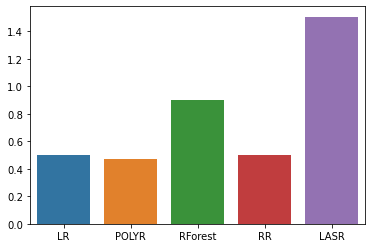

In [29]:
sns.barplot(algorithms, scores)

# ----X----X----X----X----X----X----X----X----X----X----X----X----X----X----X----X----X----